# 3<sup>o</sup> crédito de Aquisição de Conhecimento

# Agrupamento

## Sumário

- [Objetivos](#objetivos-do-trabalho)

- [Preparação](#preparacao)

- [Importando-bibliotecas-Parte-1](#importando-as-bibliotecas)

- [Importando-DataSet](#importando-dataset-water_flow_by_day-de-datasetsraw)

- [Exclusão-de-Colunas](#excluindo-colunas-irrelevantes)

- [Renomeando-Colunas](#renomeando-colunas)

- [Valores-Unicos-de-Colunas](#verificando-os-valores)

- [Mudancas-de-Tipos-das-Colunas](#mudanca-dos-tipos-das-colunas)

- [Analise-Exploratoria-dos-Dados](#analise-exploratoria-dos-dados-aed)

- [Verificacao-de-valores-NaN](#verificando-se-ha-valores-nans)

- [Verificacao-de-valores-nulos](#verificando-se-ha-valores-nulos)

- [Parte-1](#parte-1)

- [Parte-2](#parte-2)

- d

- e

## Objetivos do trabalho

No contexto de produção animal, seja a seguinte base de dados contendo o consumo diário de água pelo grupo de animais (chamado de lote):

![Exemplo_do_DataFrame](img/imagem0.png)

Para cada dia de alojamento (lot_day), temos, na ordem, a estação do ano a qual se refere
o dia, a idade dos animais do lote, o consumo médio de água por cabeça, um número identificador do lote e num número identificador do produtor/fazenda que produziu o lote.

Uma fazenda pode produzir mais de um lote.

A base contém o consumo diário entre os dias 3 e 43 de alojamento dos animais. Como mostra a imagem.

A base pode conter dados faltantes, você deve lidar com isso. Perceba que o consumo de água aumenta ao longo dos dias, então talvez preencher com valor médio não seja a solução ideal (por exemplo, o dia 3, poderia ter valor muito alto, se usarmos a média de todos os dias para preencher seu dado). Uma média local pode ser mais adequada. Além disso, descartar lotes com dados faltantes pode resultar em uma base muito pequena, então cuidado ao usar essa estratégia.

[1<sup>o</sup>](link) Você deve usar o consumo diário como variáveis para agrupar os lotes. Isto é, seu:

x<sub>1</sub> = consumo de água por cabeça no dia 3 de alojamento.

x<sub>2</sub> = consumo de água por cabeça no dia 4 de alojamento.

…

x<sub>n</sub> = consumo de água por cabeça no dia m de alojamento

a. Deve escolher quais métricas para comparação usar;

b. Qual número de grupos;

c. Qual algoritmo ou variação do algoritmo;

d. Como limpar ou lidar com os dados faltantes;

e. Para cada grupo, deve mostrar as curvas de consumo pertencentes a um grupo e seu centróide.


[2<sup>o</sup>](link) Comparar o perfil dos lotes de cada grupo encontrado. Mostrar as comparações em
gráficos e comentar sobre as diferenças ou semelhanças. Para isso, uma base de
dados auxiliar é dada, com informações extras referente ao lote:

![Exemplo_de_DataFrame](img/imagem1.png)


Em ordem: número identificador do lote, número de animais alojados, mortalidade em
percentual, idade dos animais no momento no início do lote, idade dos animais no final do
lote, peso médio dos animais no início do lote, peso médio dos animais no final do lote,
ganho de peso médio diário, consumo médio diário de ração, taxa de conversão alimentar,
dias de alojamento.

Da mesma maneira, podem haver outliers ou dados faltantes. Você não precisa usar todas
as variáveis, pode usar as mais relevantes na comparação dos grupos.

## Preparacao

### Importando as bibliotecas

In [2]:
import numpy as np
import pandas as pd

# bibliotecas graficas
from matplotlib import pyplot as plt
import seaborn as sns

# modelos
from sklearn.model_selection import train_test_split


### Importando dataset *water_flow_by_day* de *./datasets/raw/*

In [3]:
df_waterflow_raw = pd.read_csv("datasets/raw/water_flow_by_day.csv", sep = ",")

### Alguns valores do Dataset

In [4]:
df_waterflow_raw.head(5)

,Unnamed: 0,lot_day,season,age,per_capita,lot_id,prod_id
0,0,3,inv,23.0,0.346664,615812,n_3
1,1,4,inv,24.0,0.708991,615812,n_3
2,2,5,inv,25.0,0.936537,615812,n_3
3,3,6,inv,26.0,0.722595,615812,n_3
4,4,7,inv,27.0,0.744303,615812,n_3


Como podemos ver, temos uma coluna sem nome que atual como contador das linhas.

Nós vamos deletar esta coluna eventualmente, pois é irrelevante para o DataFrame.

### Verificando os tipos dos dados

In [5]:
df_waterflow_raw.dtypes

Unnamed: 0      int64
lot_day         int64
season         object
age           float64
per_capita    float64
lot_id          int64
prod_id        object
dtype: object

### Quantidade de linhas do DataFrame

In [6]:
df_waterflow_raw.shape[0]

6074

Como podemos ver:
- O DataFrame possui 6074 linhas;
- 6 colunas relevantes;

- 1 coluna irrelevante;

- A idade dos animais está sendo tratada como ponto flutuante;

- O lote está sendo tratado como ponto flututante;

- O id está sendo tratado como tipo Objeto.

### Excluindo colunas irrelevantes

In [7]:
df_waterflow_processed = df_waterflow_raw.drop(columns = ["Unnamed: 0"])
df_waterflow_processed.head(5)

,lot_day,season,age,per_capita,lot_id,prod_id
0,3,inv,23.0,0.346664,615812,n_3
1,4,inv,24.0,0.708991,615812,n_3
2,5,inv,25.0,0.936537,615812,n_3
3,6,inv,26.0,0.722595,615812,n_3
4,7,inv,27.0,0.744303,615812,n_3


### Renomeando colunas

In [8]:
colunas_renomear = {
    "lot_day"       : "dia_lote",
    "season"        : "estacao_ano",
    "age"           : "idade_animal",
    "per_capita"    : "litros_por_cabeca",
    "lot_id"        : "id_lote",
    "prod_id"       : "id_produto"
}

In [9]:
df_waterflow_processed = df_waterflow_processed.rename(columns = colunas_renomear)
df_waterflow_processed.head(5)

,dia_lote,estacao_ano,idade_animal,litros_por_cabeca,id_lote,id_produto
0,3,inv,23.0,0.346664,615812,n_3
1,4,inv,24.0,0.708991,615812,n_3
2,5,inv,25.0,0.936537,615812,n_3
3,6,inv,26.0,0.722595,615812,n_3
4,7,inv,27.0,0.744303,615812,n_3


### Verificando os valores

#### Valores únicos de cada coluna não numérica

##### Estação do ano

In [10]:
df_waterflow_processed.estacao_ano.unique()

array(['inv', 'out', 'pri', 'ver'], dtype=object)

##### ID do Lote

In [11]:
df_waterflow_processed.id_lote.unique()

array([615812, 880714, 339544, 339545, 339546, 387681, 393432, 403726,
       414323, 436332, 479845, 491363, 514226, 527072, 536408, 562446,
       589872, 637193, 664685, 720666, 758507, 794864, 542538, 542539,
       562033, 592317, 622239, 640128, 698330, 744887, 423966, 447340,
       483807, 507626, 523619, 530999, 544600, 582096, 610732, 629640,
       653501, 712037, 755669, 783289, 869971, 388793, 388794, 389469,
       400085, 483075, 501978, 522737, 529206, 544291, 571905, 607321,
       631156, 642729, 699708, 743546, 771448, 837020, 916201, 340063,
       340064, 387761, 389526, 395027, 406984, 418361, 445237, 637069,
       680260, 731535, 767820, 813661, 476539, 499077, 516748, 528115,
       539831, 339985, 339986, 339987, 389518, 393790, 405280, 415853,
       464403, 569703, 632012, 543334, 582752, 592484, 622513, 638672,
       687045, 743547, 771449, 340031, 340032, 340033, 387751, 393478,
       405281, 414343, 438737, 474020, 494878, 516243, 486165, 509381,
      

##### ID do Produto

In [12]:
df_waterflow_processed.id_produto.unique()

array(['n_3', 'n_0', 'n_1', 'n_2', 'n_9', 'n_5', 'n_11', 'n_4', 'n_6',
       'n_7', 'n_8', 'n_10', 'n_13', 'n_18'], dtype=object)

#### Verificando os valores únicos da coluna *dia_lote*

In [13]:
df_waterflow_processed.dia_lote.unique()

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43])

### Mudanca dos tipos das colunas

#### Colunas categóricas

In [14]:
# dia_lote, estacao_ano, id_lote e id_produto
df_waterflow_processed.dia_lote = df_waterflow_processed.dia_lote.astype("category")
df_waterflow_processed.estacao_ano = df_waterflow_processed.estacao_ano.astype("category")
df_waterflow_processed.id_lote = df_waterflow_processed.id_lote.astype("category")
df_waterflow_processed.id_produto = df_waterflow_processed.id_produto.astype("category")

#### Colunas numéricas

In [15]:
# idade_animal
df_waterflow_processed.idade_animal = df_waterflow_processed.dia_lote.astype("uint8")

#### DataFrame atual

In [16]:
df_waterflow_processed.sample(5)

,dia_lote,estacao_ano,idade_animal,litros_por_cabeca,id_lote,id_produto
3305,19,ver,19,5.966034,771449,n_4
5416,24,inv,24,1.348103,605011,n_10
4415,31,ver,31,2.279781,536193,n_6
3525,26,out,26,3.760179,405281,n_4
107,28,inv,28,7.565062,339544,n_3


#### Tipos das colunas

In [17]:
df_waterflow_processed.dtypes

dia_lote             category
estacao_ano          category
idade_animal            uint8
litros_por_cabeca     float64
id_lote              category
id_produto           category
dtype: object

### Salvando o DataFrame processado

In [18]:
df_waterflow_processed.to_pickle("datasets/processed/dataset-gasto-agua.pkl")

### Analise Exploratoria dos Dados (AED)

#### Idade

##### Cálculo da média

In [19]:
round(df_waterflow_processed.idade_animal.mean(), 3)

22.956

##### Cálculo da mediana

In [20]:
df_waterflow_processed.idade_animal.median()

23.0

##### Desvio padrão

In [21]:
round(df_waterflow_processed.idade_animal.std(), 3)

11.78

##### Valor mínimo

In [22]:
df_waterflow_processed.idade_animal.min()

3

##### Valor máximo

In [23]:
df_waterflow_processed.idade_animal.max()

43

#### Litros por cabeça

##### Cálculo da média

In [24]:
round(df_waterflow_processed.litros_por_cabeca.mean(), 3)

2.595

##### Cálculo da mediana

In [25]:
round(df_waterflow_processed.litros_por_cabeca.median(), 3)

2.209

##### Desvio padrão

In [26]:
round(df_waterflow_processed.litros_por_cabeca.std(), 3)

1.854

##### Valor mínimo

In [27]:
round(df_waterflow_processed.litros_por_cabeca.min(), 3)

0.002

##### Valor máximo

In [28]:
round(df_waterflow_processed.litros_por_cabeca.max(), 3)

22.702

#### dia do lote

##### Quantidade de elementos em cada lote

In [29]:
df_waterflow_processed.groupby("dia_lote").agg("count")

,estacao_ano,idade_animal,litros_por_cabeca,id_lote,id_produto
dia_lote,,,,,
3,115,115,115,115,115
4,127,127,127,127,127
5,144,144,144,144,144
6,152,152,152,152,152
7,156,156,156,156,156
8,161,161,161,161,161
9,162,162,162,162,162
10,165,165,165,165,165
11,149,149,149,149,149


#### Estação do ano

##### Quantidade de elementos em cada estacao_ano

In [30]:
df_waterflow_processed.groupby("estacao_ano", sort = True).agg("count")

,dia_lote,idade_animal,litros_por_cabeca,id_lote,id_produto
estacao_ano,,,,,
inv,1550,1550,1550,1550,1550
out,1282,1282,1282,1282,1282
pri,1745,1745,1745,1745,1745
ver,1497,1497,1497,1497,1497


#### ID do lote

##### Quantidade de elementos em cada id_lote

In [31]:
df_waterflow_processed.groupby("id_lote", sort = True).agg("count")

,dia_lote,estacao_ano,idade_animal,litros_por_cabeca,id_produto
id_lote,,,,,
339039,40,40,40,40,40
339040,39,39,39,39,39
339041,38,38,38,38,38
339083,28,28,28,28,28
339084,40,40,40,40,40
...,...,...,...,...,...
869971,39,39,39,39,39
880714,41,41,41,41,41
902085,40,40,40,40,40


#### ID do produto

##### Quantidade de elementos em cada id_produto

In [32]:
df_waterflow_processed.groupby("id_produto", sort = True).agg("count")

,dia_lote,estacao_ano,idade_animal,litros_por_cabeca,id_lote
id_produto,,,,,
n_0,247,247,247,247,247
n_1,665,665,665,665,665
n_10,199,199,199,199,199
n_11,46,46,46,46,46
n_13,377,377,377,377,377
n_18,113,113,113,113,113
n_2,829,829,829,829,829
n_3,887,887,887,887,887
n_4,602,602,602,602,602


### Verificando se ha valores NaN's

In [33]:
for coluna in df_waterflow_processed.columns:
    print("Coluna ", coluna, " : ", pd.isna(df_waterflow_processed[coluna]).sum())

Coluna  dia_lote  :  0
Coluna  estacao_ano  :  0
Coluna  idade_animal  :  0
Coluna  litros_por_cabeca  :  0
Coluna  id_lote  :  0
Coluna  id_produto  :  0


### Verificando se ha valores nulos

In [34]:
for coluna in df_waterflow_processed.columns:
    print("Coluna ", coluna, " : ", pd.isnull(df_waterflow_processed[coluna]).sum())

Coluna  dia_lote  :  0
Coluna  estacao_ano  :  0
Coluna  idade_animal  :  0
Coluna  litros_por_cabeca  :  0
Coluna  id_lote  :  0
Coluna  id_produto  :  0


### Representacao grafica

#### Histograma

In [49]:
def histograma(x:pd.Series, titulo:str = "Histograma", xlabel:str = None, ylabel:str = None, numerical:bool = True) -> None:
    figura = plt.figure(figsize = (12, 8))
    plt.hist(x = x)
    plt.title(titulo)
    
    if numerical == True:
        plt.xlim(x.min(), x.max())
    
    if xlabel != None:
        plt.xlabel(xlabel = xlabel)
    
    if ylabel != None:
        plt.ylabel(ylabel = ylabel)
    
    plt.show()

#### Scatterplot

In [55]:
def dispersao(x:pd.Series, y:pd.Series, titulo:str = "Gráfico de dispersão", xlabel:str = None, ylabel:str = None, numerical:bool = True) -> None:
    figura = plt.figure(figsize = (12, 8))
    plt.scatter(x = x, y = y)
    plt.title(titulo)
    
    if numerical == True:
        plt.xlim(x.min(), x.max())
    
    if xlabel != None:
        plt.xlabel(xlabel = xlabel)
    
    if ylabel != None:
        plt.ylabel(ylabel = ylabel)
    
    plt.show()

#### Boxplot

In [65]:
def boxplot(x:pd.Series, titulo:str = "Gráfico de boxplot", xlabel:str = None, ylabel:str = None) -> None:
    figura = plt.figure(figsize = (12, 8))
    sns.boxplot(x = x)
    plt.title(titulo)
    
    if xlabel != None:
        plt.xlabel(xlabel = xlabel)
    
    if ylabel != None:
        plt.ylabel(ylabel = ylabel)
    
    plt.show()

#### Distribuicao normal

In [73]:
def distribuicao_normal(x:pd.Series, titulo:str = "Gráfico de distribuição normal", xlabel:str = None, ylabel:str = None) -> None:
    figura = plt.figure(figsize = (12, 8))
    sns.distplot(x = x)
    plt.title(titulo)
    plt.xlim(x.min(), x.max())
    
    if xlabel != None:
        plt.xlabel(xlabel = xlabel)
    
    if ylabel != None:
        plt.ylabel(ylabel = ylabel)
    
    plt.show()

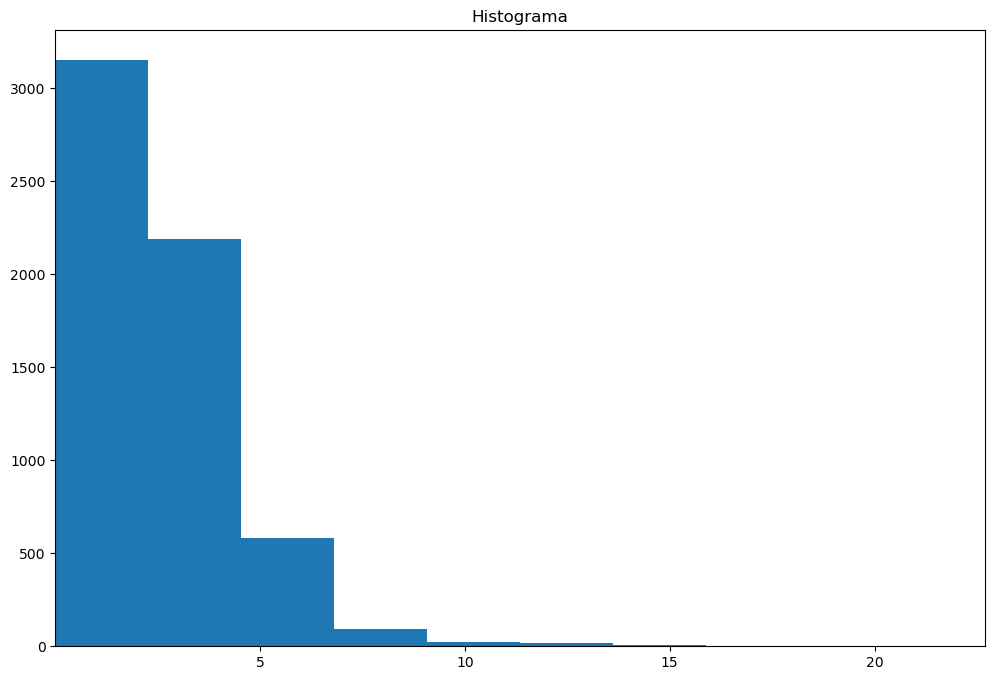

In [51]:
histograma(x = df_waterflow_processed["litros_por_cabeca"])

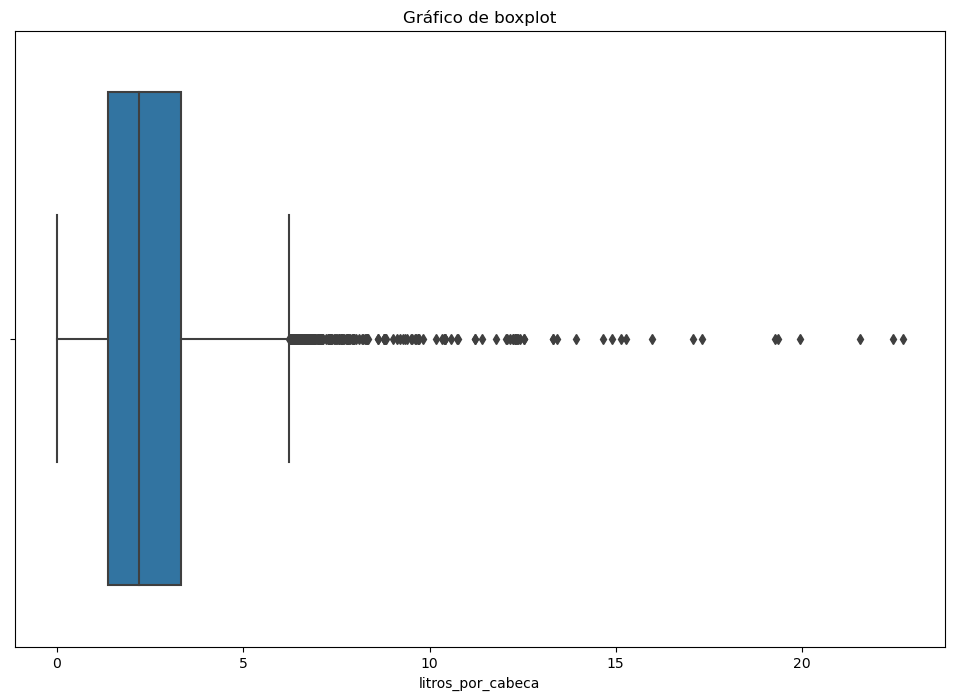

In [67]:
boxplot(x = df_waterflow_processed["litros_por_cabeca"])

/tmp/ipykernel_12676/2553199722.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = x)


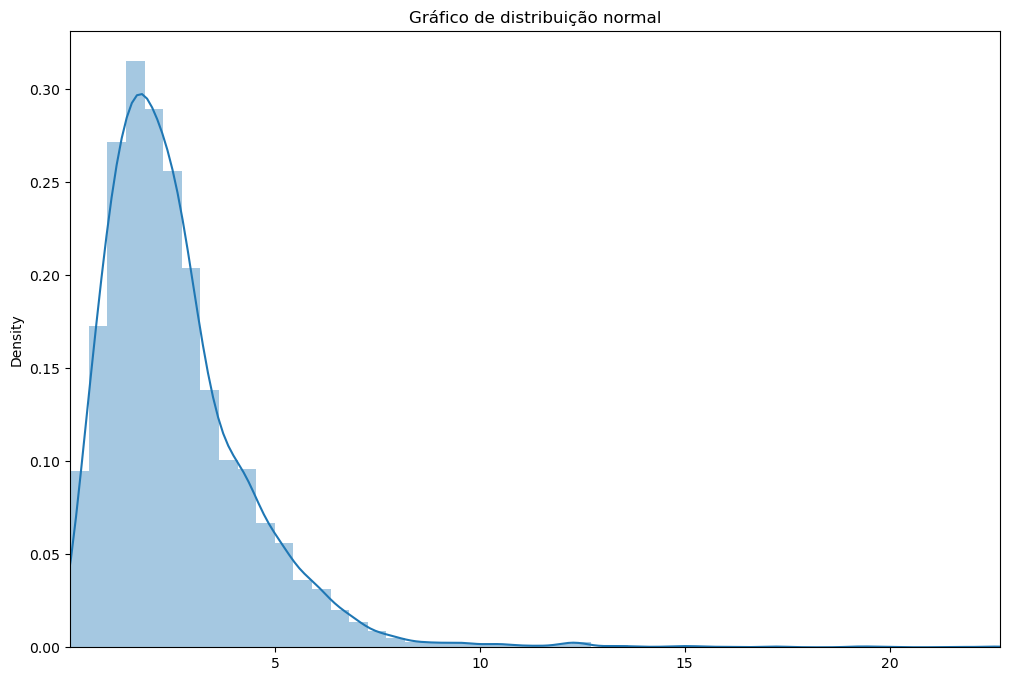

In [74]:
distribuicao_normal(x = df_waterflow_processed["litros_por_cabeca"])

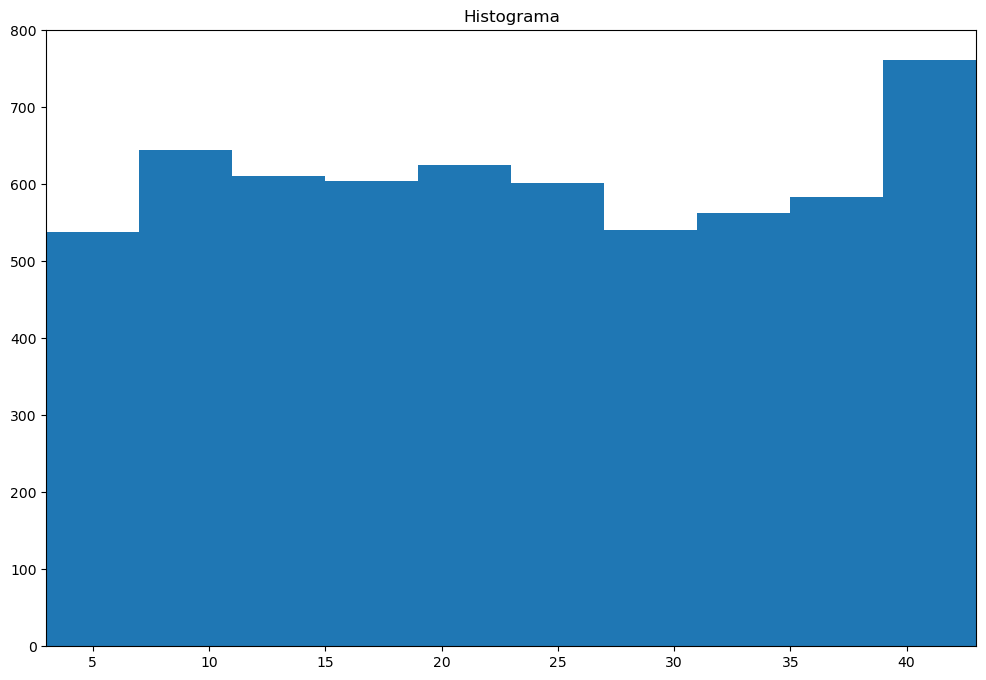

In [43]:
histograma(x = df_waterflow_processed["idade_animal"])

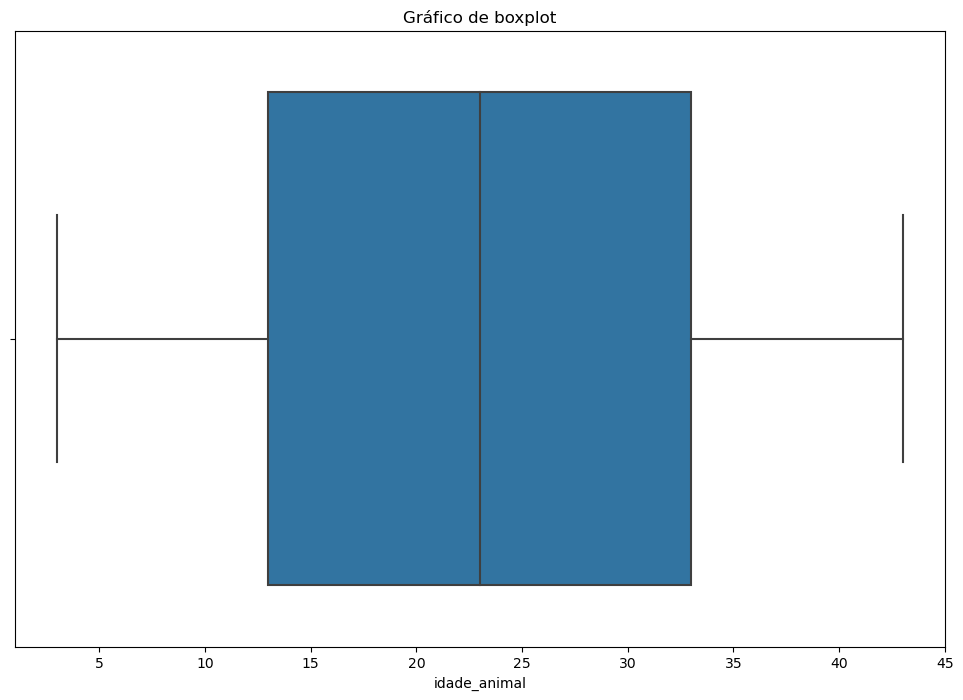

In [66]:
boxplot(x = df_waterflow_processed["idade_animal"])

/tmp/ipykernel_12676/2553199722.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = x)


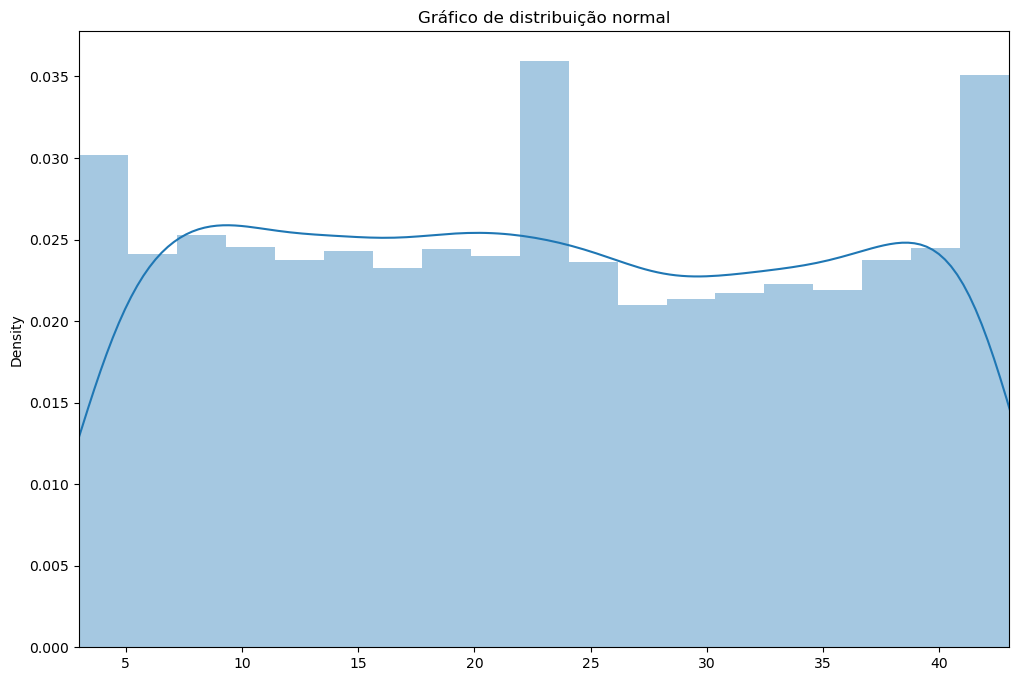

In [75]:
distribuicao_normal(x = df_waterflow_processed["idade_animal"])

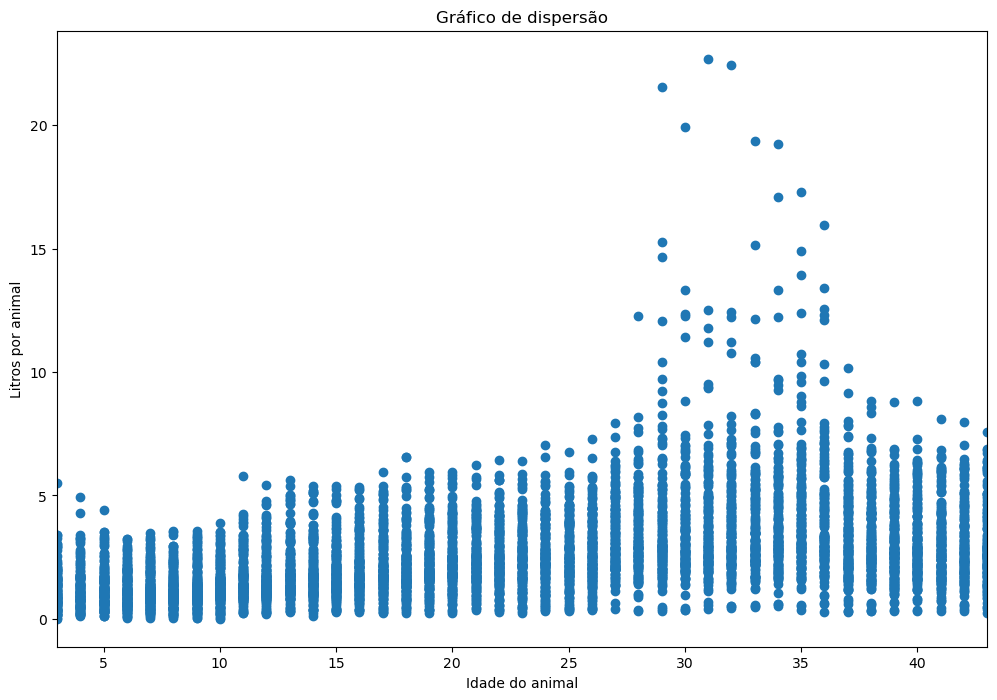

In [58]:
dispersao(
    y = df_waterflow_processed["litros_por_cabeca"],
    x = df_waterflow_processed["idade_animal"],
    xlabel = "Idade do animal",
    ylabel = "Litros por animal"
)

### Separando o dataset em classes, segundo a estação do ano

In [36]:
# estacoes do dataframe: 'inv', 'out', 'pri', 'ver'
classe_inverno = df_waterflow_processed.query("estacao_ano == 'inv'")
classe_primavera = df_waterflow_processed.query("estacao_ano == 'pri'")
classe_verao = df_waterflow_processed.query("estacao_ano == 'ver'")
classe_outono = df_waterflow_processed.query("estacao_ano == 'out'")

In [37]:
print("Tamanho da classe inverno\t", classe_inverno.shape[0])
print("Tamanho da classe primavera\t", classe_primavera.shape[0])
print("Tamanho da classe verão\t\t", classe_verao.shape[0])
print("Tamanho da classe outono\t", classe_outono.shape[0])

Tamanho da classe inverno	 1550
Tamanho da classe primavera	 1745
Tamanho da classe verão		 1497
Tamanho da classe outono	 1282


### Gráficos

## Parte 1

## Parte 2